# EDA: Cafe Sales Data



📂 Dataset Info
* **File:** `clean_cafe_sales.csv`

🎯 Objectives of Analysis

This notebook focuses on **Exploratory Data Analysis (EDA)** of the dataset cleaned in the previous step. The primary goal is to transform the clean data into actionable business insights and understand the underlying patterns.

**Key Business Questions:**

1.  **Sales Performance Analysis:**
    * Which items are the bestsellers, and which are underperforming?
    * What is the distribution of unit prices and total transaction values?

2.  **Time Series Analysis:**
    * How do sales evolve over time? Are there any visible trends or seasonality?
    * Which days of the week or months are the most profitable?

3.  **Operational Insights:**
    * What are the most popular payment methods among customers?
    * Are there significant performance differences between store locations?

> **Outcome:** A set of visualizations and data-driven summaries to help the café owner optimize the menu and daily operations.

## Loading data and libraries

In [6]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for all plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the CLEAN dataset
df = pd.read_csv("clean_cafe_sales.csv")

# Convert transaction_date to datetime (csv stores it as string)
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Check results
print(f"Loaded Clean Dataset: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Loaded Clean Dataset: 9540 rows, 8 columns


,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-Store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,8.0,Credit Card,In-Store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,Unknown,Unknown,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-Store,2023-06-11


## 1. Categorical Variable Analysis
In this section, we explore the distribution of our categorical data: `item`, `payment_method`, and `location`. This helps us understand the most popular products and operational preferences.

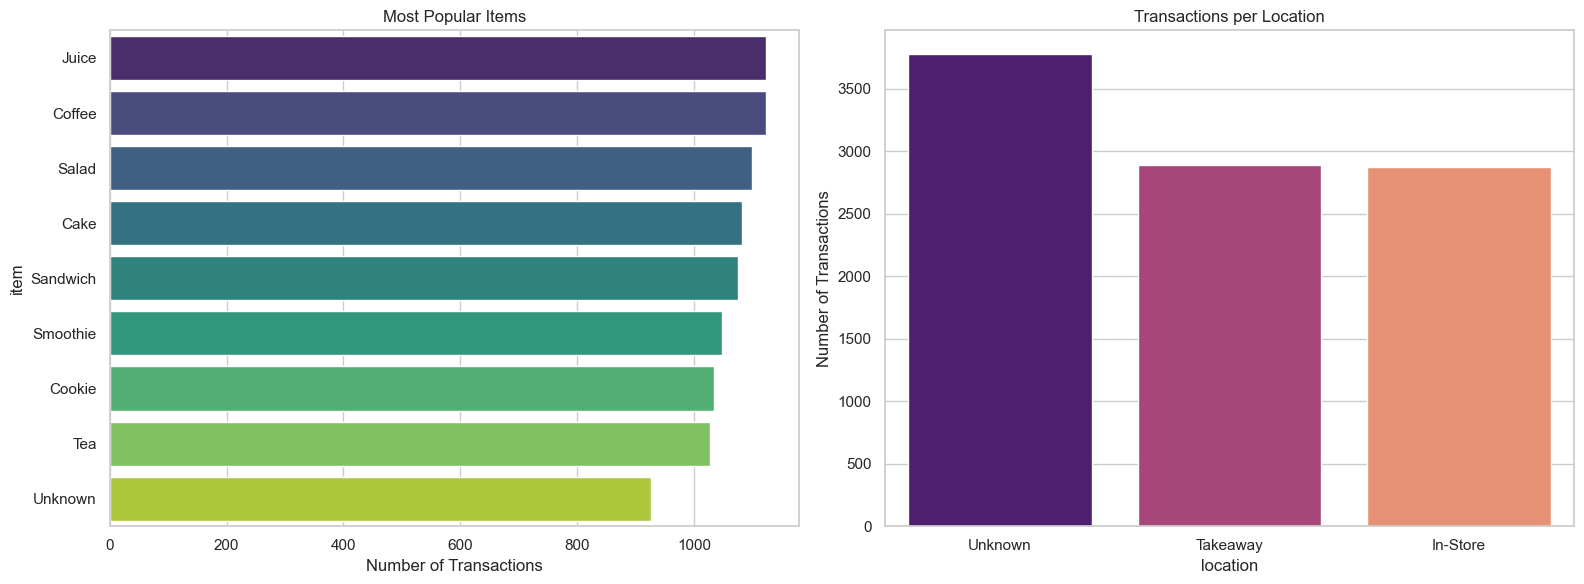

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top Selling Items
sns.countplot(data=df, y='item', order=df['item'].value_counts().index, ax=axes[0], palette='viridis')
axes[0].set_title('Most Popular Items')
axes[0].set_xlabel('Number of Transactions')

# Plot 2: Transaction Volume by Location
sns.countplot(data=df, x='location', order=df['location'].value_counts().index, ax=axes[1], palette='magma')
axes[1].set_title('Transactions per Location')
axes[1].set_ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

In [9]:
# Print the exact counts for clarity
print("Value counts for Items:")
print(df['item'].value_counts())

Value counts for Items:
item
Juice       1124
Coffee      1123
Salad       1099
Cake        1082
Sandwich    1075
Smoothie    1048
Cookie      1035
Tea         1027
Unknown      927
Name: count, dtype: int64


## 2. Numerical Analysis & Revenue
Since the sales volume is evenly distributed across items, we need to investigate the **financial performance**.
* What is the distribution of transaction amounts?
* Does `Total Spent` vary significantly by Item or Location?

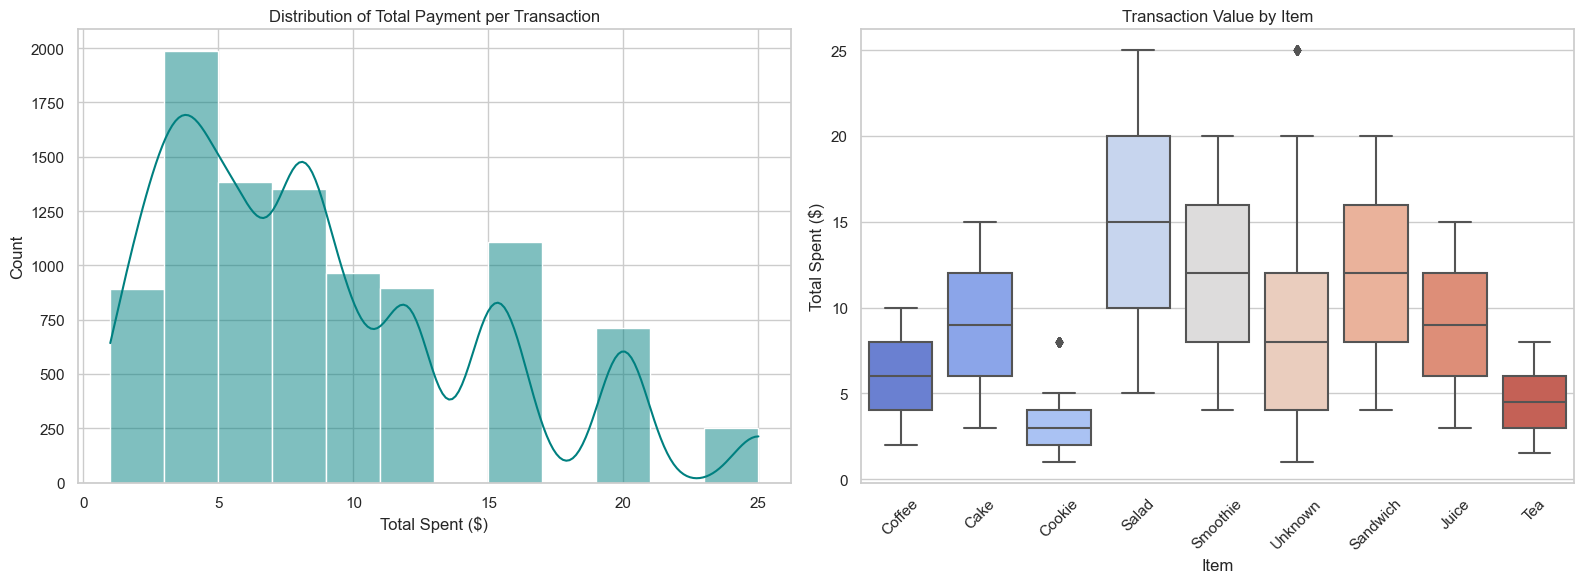

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution of Total Spent (Histogram)
sns.histplot(data=df, x='total_spent', kde=True, ax=axes[0], color='teal', binwidth=2)
axes[0].set_title('Distribution of Total Payment per Transaction')
axes[0].set_xlabel('Total Spent ($)')

# Plot 2: Boxplot of Total Spent by Item
sns.boxplot(data=df, x='item', y='total_spent', ax=axes[1], palette='coolwarm')
axes[1].set_title('Transaction Value by Item')
axes[1].set_xlabel('Item')
axes[1].set_ylabel('Total Spent ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Summary Statistics for Total Spent

In [ ]:
print("Statistics for Total Spent:")
print(df['total_spent'].describe())

Statistics for Total Spent:
count    9540.000000
mean        8.868816
std         5.861817
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        25.000000
Name: total_spent, dtype: float64


## 3. Time Series Analysis
We have analyzed *what* is being sold and for *how much*. Now, we focus on **when** sales occur.

**Key Questions:**
* How do total sales fluctuate over time?
* Which days of the week are the busiest in terms of revenue?

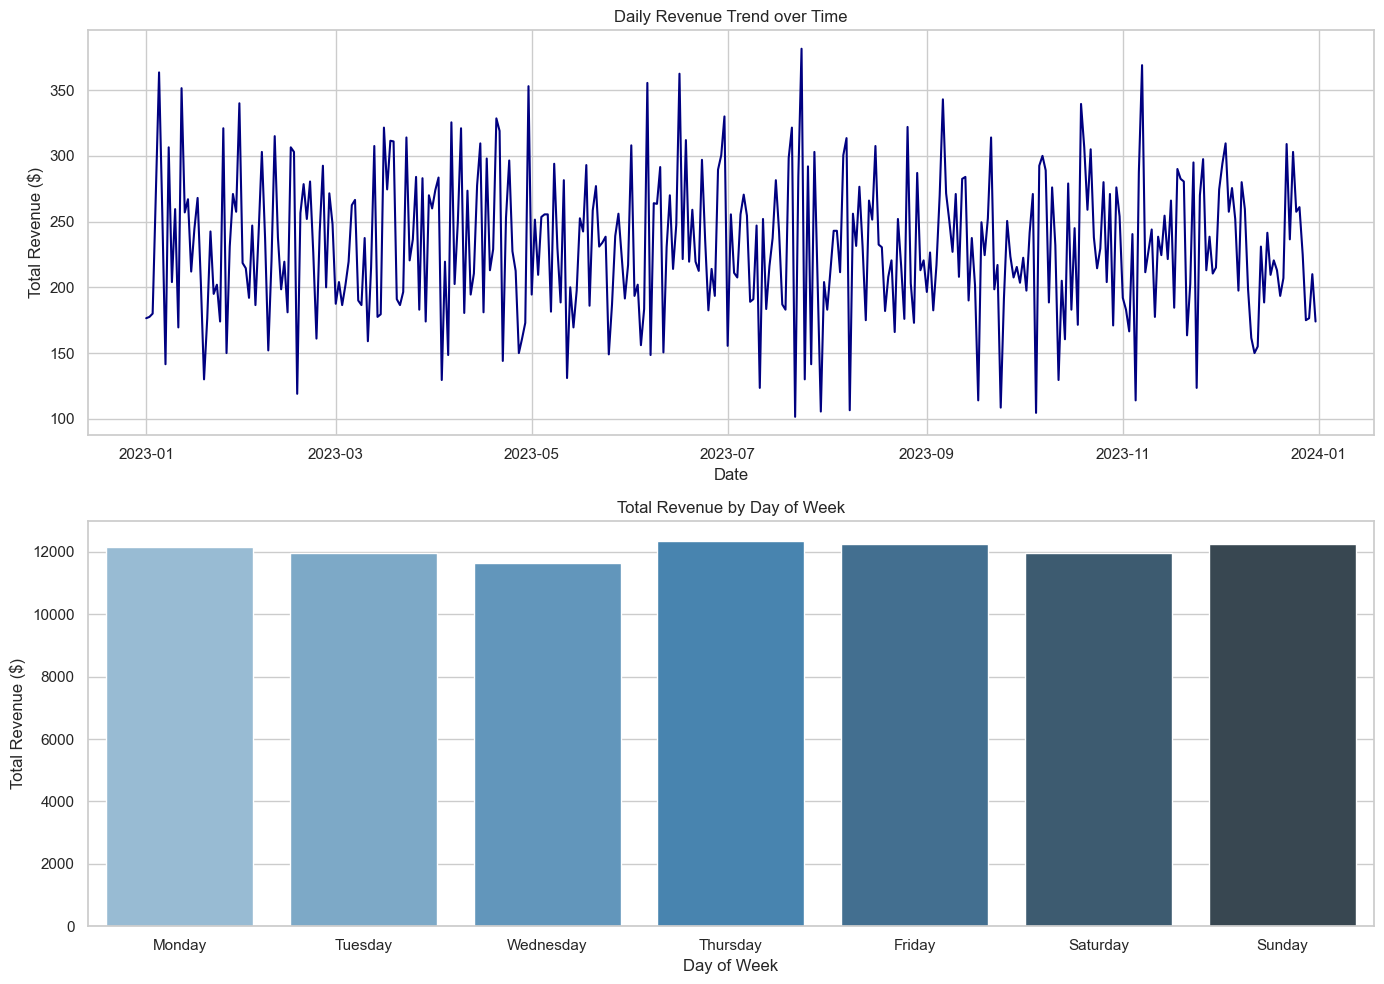

In [16]:
# Data Preparation for Time Series 

# Aggregate sales by Date
daily_sales = df.groupby('transaction_date')['total_spent'].sum().reset_index()

# Extract Day of Week from the date
df['day_of_week'] = df['transaction_date'].dt.day_name()

# Define correct order for days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Daily Sales Trend 
sns.lineplot(data=daily_sales, x='transaction_date', y='total_spent', ax=axes[0], color='navy')
axes[0].set_title('Daily Revenue Trend over Time')
axes[0].set_ylabel('Total Revenue ($)')
axes[0].set_xlabel('Date')

# Plot 2: Total Revenue by Day of Week 
weekly_sales = df.groupby('day_of_week')['total_spent'].sum().reindex(days_order).reset_index()
sns.barplot(data=weekly_sales, x='day_of_week', y='total_spent', ax=axes[1], palette='Blues_d')
axes[1].set_title('Total Revenue by Day of Week')
axes[1].set_ylabel('Total Revenue ($)')
axes[1].set_xlabel('Day of Week')

plt.tight_layout()
plt.show()

## 4. Final Conclusion & Recommendations

Based on the Exploratory Data Analysis (EDA) of the cleaned dataset, we can draw the following conclusions:

### 📊 Key Findings

1.  **Synthetic Nature of Data:** The sales volume is perfectly evenly distributed across all items and days of the week. There is no visible seasonality, growth trend, or "bestseller" item in terms of volume.

2.  **Revenue Drivers:** While sales volume is equal, **Salads and Sandwiches** generate higher revenue per transaction compared to Cookies or Coffee.

